# <strong><font color="77A316">Data Science: Transformación de variables para una Regresión Lineal</font></strong>


---

# **Clase 1 - Análisis preliminar**

## **Precificación de inmuebles**

**Problema de negocio:**

Tú, como **científico/a de datos** de una inmobiliaria, necesitas crear un modelo que sea capaz de estimar los precios de diferentes inmuebles para que el equipo de vendedores y vendedoras pueda negociarlas con clientes potenciales.

Para ello, vamos a observar las principales características de las casas que ya han sido vendidas de acuerdo con la base de datos que recibimos, analizar estos datos y construir un modelo de aprendizaje automático (ML), evaluando su eficacia.

<img src="https://raw.githubusercontent.com/afonsosr2/data-science-regressao-linear/main/imagens/casas.webp" alt="Ilustración de un conjunto de casas de estilo moderno. Tenemos casas de 1 a 2 pisos" width=720>

**Objetivo**

Estimar los precios de los inmuebles de acuerdo con diversas características de las propiedades, como el área y la ubicación. Para este propósito, vamos a:

* Identificar qué factores contribuyen a la fijación de precios de los inmuebles;
* Analizar la influencia de las características en el precio del inmueble;
* Diferenciar cuándo es necesario transformar o no las variables para obtener una mejor respuesta del modelo;
* Verificar la relación entre las variables explicativas y la variable respuesta;
* Crear un modelo de regresión lineal con múltiples variables;
* Realizar predicciones para una o más casas.

**Base de datos:**

Vamos a utilizar la base `inmuebles.csv`, adaptada de una base muy conocida en **Kaggle** llamada [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv).

Estos datos serán leídos a partir del repositorio compartido en GitHub.









## **1.2 - Conociendo los datos**

---



In [1]:
# Importando la biblioteca para el tratamiento de los datos
import pandas as pd

In [2]:
# Cargando los datos
datos = pd.read_csv('https://raw.githubusercontent.com/alura-es-cursos/2265-regresion-lineal-transformacion-de-variables/refs/heads/main/inmuebles.csv')

In [3]:
# Visualizando las primeras filas
datos.head()

,valor,area_primer_piso,existe_segundo_piso,area_patio,dist_metro,dist_parque
0,193055.555556,79.52,1,23.86,1.639,3.039
1,168055.555556,117.24,0,35.17,1.538,10.910
2,206944.444444,85.47,1,25.64,1.275,11.791
3,129629.629630,89.28,1,21.07,1.223,10.877
4,231481.481481,106.37,1,31.91,0.868,11.247


In [4]:
# Verificando la cantidad de datos
datos.shape

(1460, 6)

In [5]:
# Cómo están los datos? Tenemos datos nulos? Cuáles son sus tipos?
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   valor                1460 non-null   float64
 1   area_primer_piso     1460 non-null   float64
 2   existe_segundo_piso  1460 non-null   int64  
 3   area_patio           1460 non-null   float64
 4   dist_metro           1460 non-null   float64
 5   dist_parque          1460 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.6 KB


## **1.3 - Entendiendo la relación entre los datos**

---



Para entender la relación de los datos entre el valor de venta de los inmuebles del dataset y sus características, utilizaremos la **Correlación**.

La correlación es una medida estadística que varía en una escala de -1 a 1, indicando la relación y la dependencia entre dos variables. Existen tres tipos principales de correlación:

1. **Correlación Positiva:** cuando una variable aumenta, la otra tiende a aumentar.
2. **Correlación Nula:** no existe una relación lineal entre las variables.
3. **Correlación Negativa:** cuando una variable aumenta, la otra tiende a disminuir.

Esta medida no solo define la dirección, sino también la intensidad de la relación.

In [6]:
# Correlación entre todos los datos
corr = datos.corr().round(3)
corr

,valor,area_primer_piso,existe_segundo_piso,area_patio,dist_metro,dist_parque
valor,1.000,0.606,0.138,0.614,-0.644,-0.071
area_primer_piso,0.606,1.000,-0.339,0.820,-0.369,-0.058
existe_segundo_piso,0.138,-0.339,1.000,-0.301,-0.191,-0.007
area_patio,0.614,0.820,-0.301,1.000,-0.440,-0.058
dist_metro,-0.644,-0.369,-0.191,-0.440,1.000,0.089
dist_parque,-0.071,-0.058,-0.007,-0.058,0.089,1.000


In [7]:
# Correlación del precio de venta
corr['valor'].to_frame()

,valor
valor,1.000
area_primer_piso,0.606
existe_segundo_piso,0.138
area_patio,0.614
dist_metro,-0.644
dist_parque,-0.071


## **1.4 - Visualizando una Regresión lineal con una variable independiente**

---



Ya comprendemos un poco la relación entre las variables y el valor de venta de las casas. Pero, ¿qué tal si observamos esto de forma visual, tomando solo una de las variables de nuestra base?

> No te preocupes, aquí solo vamos a observar el comportamiento de la variable `valor` en relación con `area_primer_piso`, ejecutando un modelo de regresión lineal dentro de la función `regplot()` de la biblioteca `seaborn`. ¡Más adelante implementaremos nuestro propio modelo!


In [8]:
# Importando las bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt

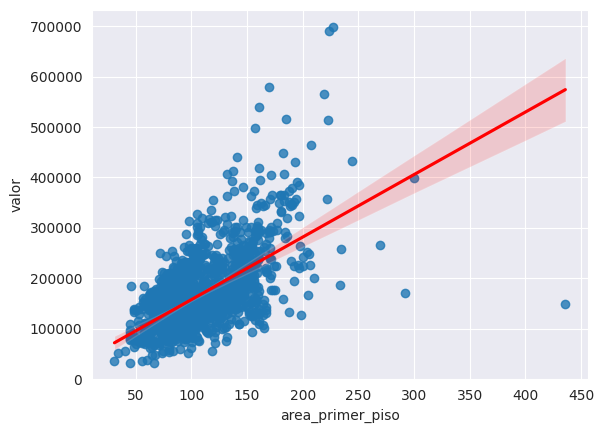

In [9]:
sns.set_style('darkgrid')
sns.regplot(x='area_primer_piso',y='valor',data=datos,line_kws={'color':'red'})
plt.show()

Vamos a ampliar nuestro análisis y verificar el comportamiento de la variable dependiente y de las variables explicativas?

# **Clase 2 - Análisis gráfico**

## **2.1 - Visualizando el comportamiento de la variable dependiente**

---



<img src="https://github.com/alura-es-cursos/2265-regresion-lineal-transformacion-de-variables/blob/main/imagenes/boxplot.png?raw=true" alt="Boxplot esperado para la variable dependiente" width=720>

El **boxplot** es una representación visual que muestra la distribución de datos cuantitativos, facilitando comparaciones entre variables o categorías.

Los elementos principales de un boxplot son:

* **Caja:** Representa el intervalo intercuartílico (IIC), que va desde el primer cuartil (Q1 - 25 % de los datos) hasta el tercer cuartil (Q3 - 75 % de los datos).

* **Línea mediana:** Indica la posición de la mediana (Q2), valor que divide el conjunto de datos en dos mitades iguales (50 %).

* **Bigotes (whiskers):** Extensiones que muestran la variabilidad fuera del intervalo intercuartílico, generalmente hasta 1,5 veces el IIC a partir de los cuartiles.

* **Valores atípicos (outliers):** Puntos individuales que se encuentran fuera del alcance de los *bigotes*, representados de forma separada.

Esta visualización ayuda a identificar la tendencia central, la dispersión y la presencia de posibles valores atípicos en un conjunto de datos.


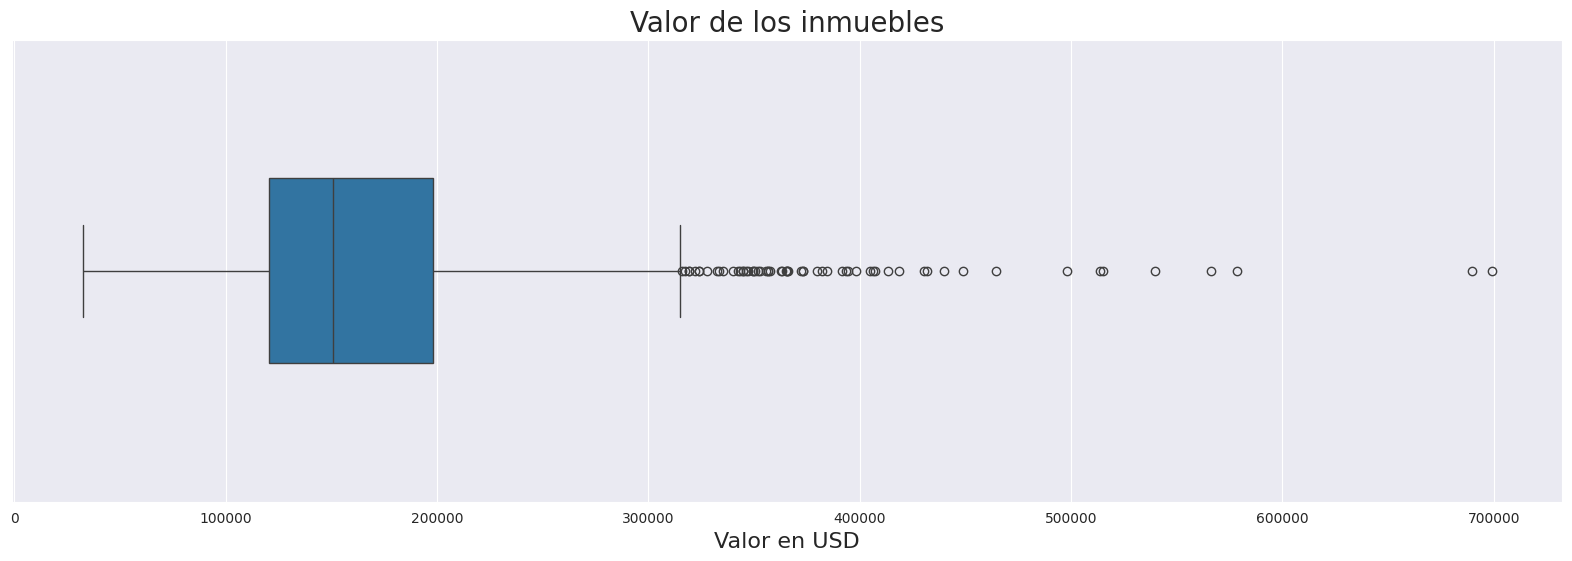

In [10]:
ax = sns.boxplot(datos,x='valor',width=0.4)

ax.figure.set_size_inches(20,6)
ax.set_title('Valor de los inmuebles',fontsize=20)
ax.set_xlabel('Valor en USD',fontsize=16)

plt.show()

Este boxplot nuestro está muy hacia la izquierda. ¿Vamos a investigar este comportamiento utilizando otra visualización de la distribución de los datos?


In [11]:
datos['valor'].mean()

np.float64(167519.62582445456)

## **2.2 - Investigando la distribución de frecuencias de la variable dependiente**

---



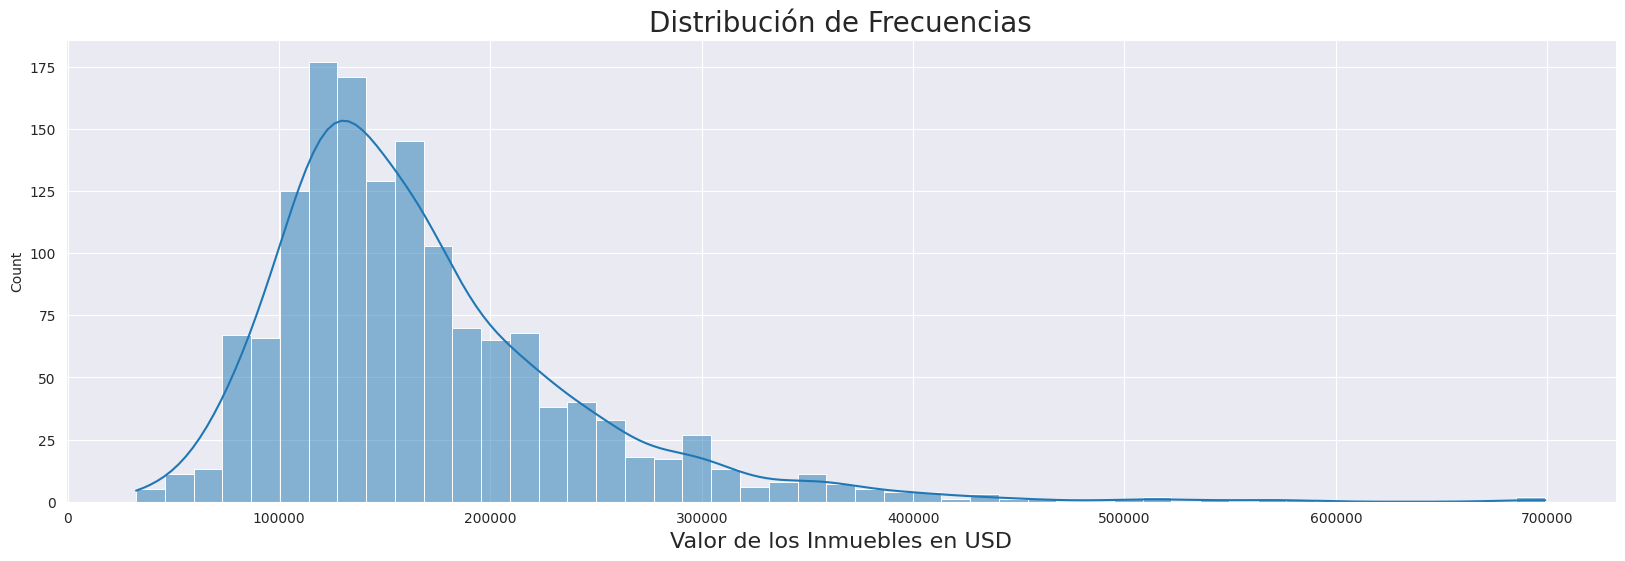

In [12]:
ax = sns.histplot(datos['valor'], kde=True)

ax.figure.set_size_inches(20,6)
ax.set_title('Distribución de Frecuencias',fontsize=20)
ax.set_xlabel('Valor de los Inmuebles en USD', fontsize=16)

plt.show()

<img src="https://github.com/alura-es-cursos/2265-regresion-lineal-transformacion-de-variables/blob/main/imagenes/distribucion.png?raw=true" alt="Distribución de frecuencias para las distribuciones normales asimétricas a la derecha, simétrica y asimétrica a la izquierda" width=720>

Existen tres tipos principales de distribución de frecuencias:

1. **Distribución Asimétrica a la Derecha (Positivamente Asimétrica)**: la cola larga se encuentra a la derecha de la mediana. En este caso, la media de los datos es mayor que la mediana.
**Ejemplo:** salarios en una empresa, donde pocas personas (con cargos más gerenciales) tienen salarios más altos.

2. **Distribución Simétrica**: la distribución es reflejada alrededor de las medidas de tendencia central. La característica principal es que la media, la mediana y la moda son iguales o muy cercanas entre sí.

3. **Distribución Asimétrica a la Izquierda (Negativamente Asimétrica)**: la cola larga se encuentra a la izquierda de la mediana. En este caso, la media de los datos es menor que la mediana.
**Ejemplo:** calificaciones de exámenes donde la mayoría de los estudiantes obtiene puntajes altos, pero algunos obtienen puntajes muy bajos.


Al observar gráficamente el comportamiento de la variable dependiente (Y → Valor del inmueble), descubrimos que estamos tratando con una **Distribución Asimétrica a la Derecha**, y sabemos que será necesario realizar una transformación de estos datos antes de aplicar el modelo.

¿Qué tal si ahora observamos también las variables independientes (explicativas) y cómo están distribuidas en relación con el valor?


## **2.3 - Analizando las variables independientes**

---



Vamos a graficar ahora la relación entre las variables del conjunto de datos, teniendo en cuenta el valor del inmueble, utilizando el pairplot().

In [13]:
## Columnas de los datos
datos.columns

Index(['valor', 'area_primer_piso', 'existe_segundo_piso', 'area_patio',
       'dist_metro', 'dist_parque'],
      dtype='object')

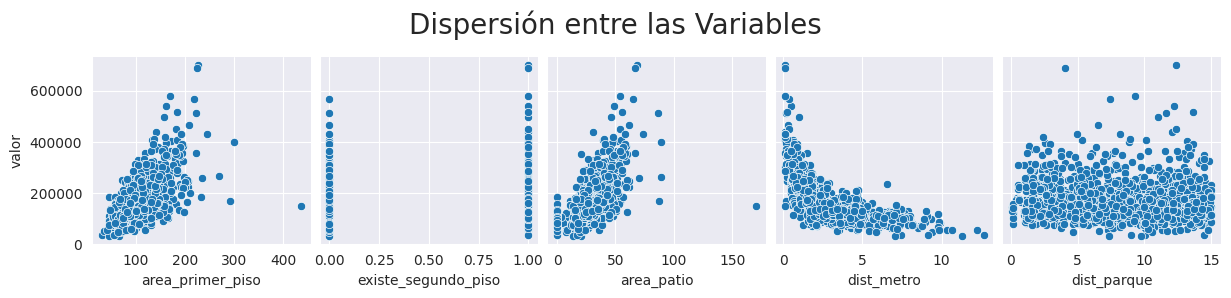

In [14]:
# Pairplot sin la recta de regresión
ax = sns.pairplot(datos, y_vars='valor',x_vars=['area_primer_piso', 'existe_segundo_piso', 'area_patio',
       'dist_metro', 'dist_parque'])
ax.figure.suptitle('Dispersión entre las Variables',fontsize=20, y=1.15)
plt.show()

Para el *pairplot* con la línea de regresión, vamos a retirar la columna de generación del visual `existe_segundo_piso`:

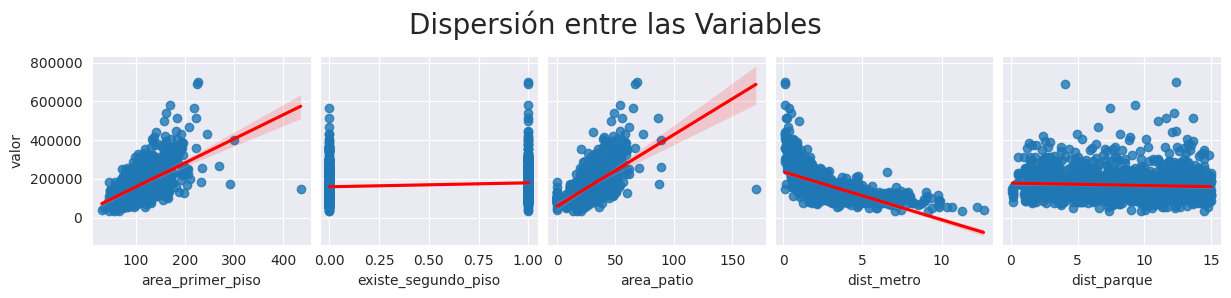

In [15]:
# Pairplot con la recta de regresión
ax = sns.pairplot(datos, y_vars='valor',x_vars=['area_primer_piso', 'existe_segundo_piso', 'area_patio',
       'dist_metro', 'dist_parque'],kind='reg',plot_kws={'line_kws':{'color':'red'}})
ax.figure.suptitle('Dispersión entre las Variables',fontsize=20, y=1.15)
plt.show()

¡Ya hemos visto cosas interesantes aquí! ¿Vamos a pasar a la transformación de las variables? ¿Y qué tipo de transformación vamos a hacer?


# **Clase 3 - Transformación de Variables**

## **Curva logarítmica**

---



<img src="https://github.com/afonsosr2/data-science-regressao-linear/blob/main/imagens/curva_log_slide.png?raw=true" alt="Gráfico representando a curva de um logarítmo neperiano (ln(x))" width=720>

La **curva logarítmica** es una representación gráfica de una función logarítmica, específicamente usando el **logaritmo natural** ($ln$), que tiene como base $e$ (aproximadamente igual a 2,718). Sirve para transformar datos exponenciales en una escala lineal.

La función logarítmica natural se define como $y = ln(x)$, donde $x > 0$. Esta curva se utiliza ampliamente para ajustar datos que crecen rápidamente, facilitando su visualización e interpretación.

Su característica principal es el crecimiento de la curva, pero a una tasa decreciente. Es decir, se observa un aplanamiento de la curva a medida que el valor de $x$ aumenta. Esto permite que valores grandes puedan representarse en una misma visualización junto con valores pequeños (por ejemplo, 1, 10, 100 y 1000).

In [16]:
import numpy as np

In [17]:
np.log(0)

/tmp/ipython-input-2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


np.float64(-inf)

In [18]:
np.log(1)

np.float64(0.0)

In [19]:
np.log(1_000_000)

np.float64(13.815510557964274)

Es posible observar que queremos evitar calcular el logaritmo de 0; por lo tanto, debemos prestar atención al analizar los datos antes de efectuar la transformación logarítmica. Vamos a transformar nuestros datos y observar cómo sería un modelo **log-log**.


## **3.1 - Transformando los datos**

---



<img src="https://github.com/alura-es-cursos/2265-regresion-lineal-transformacion-de-variables/blob/main/imagenes/log%20log.png?raw=true" alt="Presentando la transformación logarítmica de un modelo log-linear">

### **Aplicando la transformación logarítmica**

* [np.log()](https://numpy.org/doc/stable/reference/generated/numpy.log.html)
* [np.log1p()](https://numpy.org/doc/stable/reference/generated/numpy.log1p.html)

In [20]:
# Verificando si hay 0 en las variables explicativas de nuestro conjunto de datos
datos.describe().round(2)

,valor,area_primer_piso,existe_segundo_piso,area_patio,dist_metro,dist_parque
count,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,167519.63,108.01,0.43,29.47,2.77,8.15
std,73557.87,35.92,0.50,12.23,1.91,4.20
min,32314.81,31.03,0.00,0.00,0.10,0.12
25%,120347.22,81.94,0.00,22.18,1.42,4.44
50%,150925.93,100.98,0.00,27.64,2.26,8.72
75%,198148.15,129.25,1.00,36.18,3.89,11.63
max,699074.07,435.90,1.00,170.29,12.65,15.00


In [21]:
# Transformando las variables explicativas y de respuesta utilizando el logaritmo
datos['log_valor'] = np.log(datos['valor'])
datos['log_area_primer_piso'] = np.log(datos['area_primer_piso'])
datos['log_area_patio'] = np.log1p(datos['area_patio'])
datos['log_dist_metro'] = np.log(datos['dist_metro'])
datos['log_dist_parque'] = np.log(datos['dist_parque'])

In [22]:
# Leyendo los datos
datos.head(3)

,valor,area_primer_piso,existe_segundo_piso,area_patio,dist_metro,dist_parque,log_valor,log_area_primer_piso,log_area_patio,log_dist_metro,log_dist_parque
0,193055.555556,79.52,1,23.86,1.639,3.039,12.170733,4.376009,3.213260,0.494086,1.111529
1,168055.555556,117.24,0,35.17,1.538,10.910,12.032050,4.764223,3.588230,0.430483,2.389680
2,206944.444444,85.47,1,25.64,1.275,11.791,12.240206,4.448165,3.282414,0.242946,2.467337


Ahora que hemos realizado la transformación de los datos, ¿vamos a verificar cómo quedaron nuestras variables de forma gráfica?

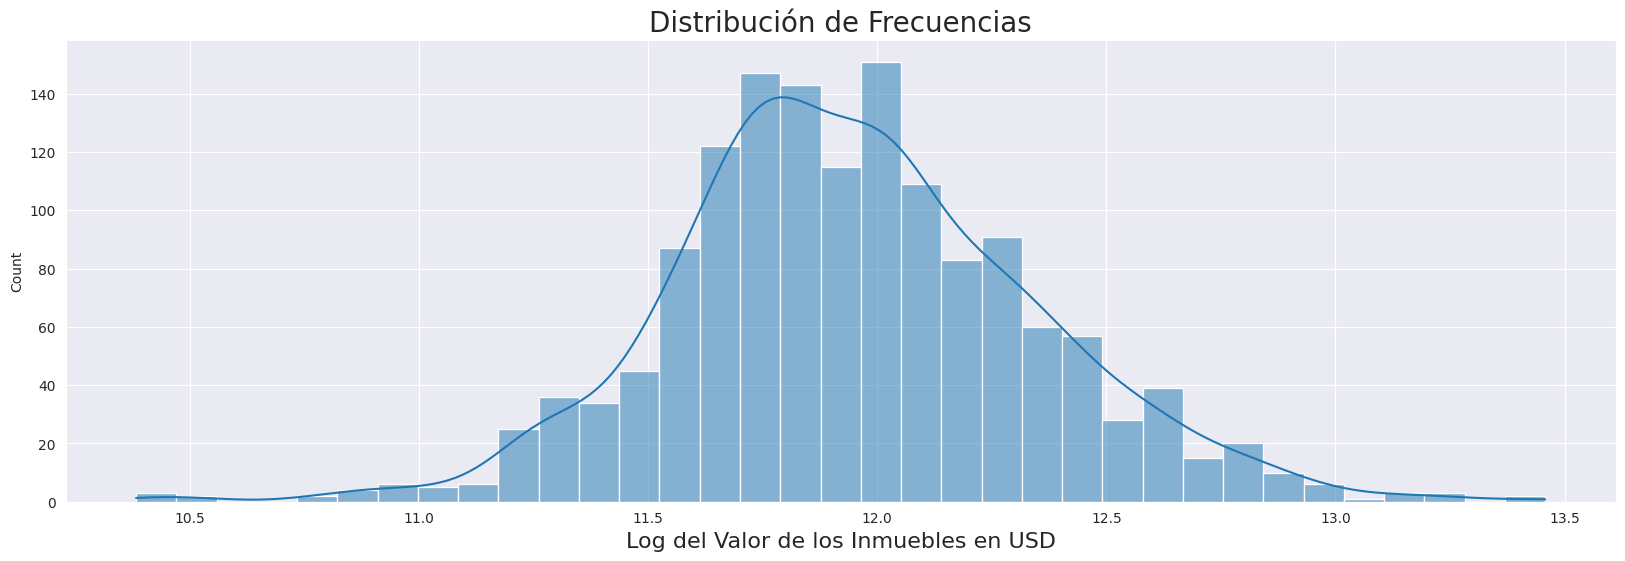

In [23]:
ax = sns.histplot(datos['log_valor'], kde=True)

ax.figure.set_size_inches(20,6)
ax.set_title('Distribución de Frecuencias',fontsize=20)
ax.set_xlabel('Log del Valor de los Inmuebles en USD', fontsize=16)

plt.show()

Vamos ahora a analizar cómo quedaron también las distribuciones de nuestras variables explicativas, por separado, de acuerdo con el valor del inmueble.


## **3.2 - Verificando la relación lineal**

---



Vamos a utilizar básicamente el mismo código, solo recordando colocar el `log_` en todas las que hayan sufrido una transformación logarítmica.

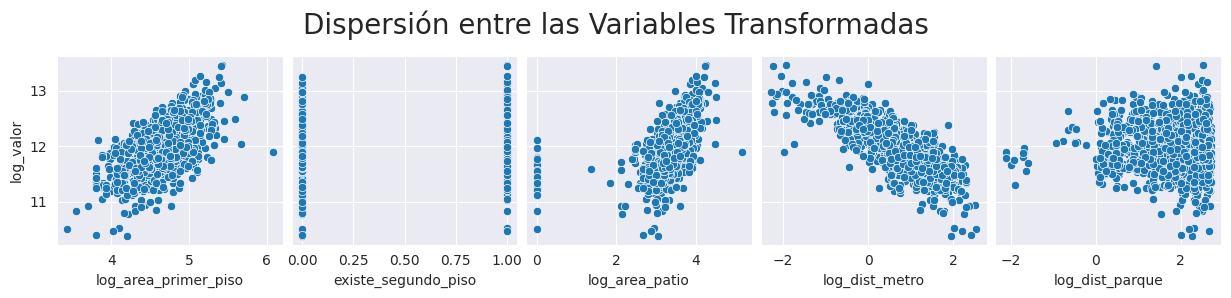

In [24]:
ax = sns.pairplot(datos, y_vars='log_valor',x_vars=['log_area_primer_piso', 'existe_segundo_piso', 'log_area_patio',
       'log_dist_metro', 'log_dist_parque'])
ax.figure.suptitle('Dispersión entre las Variables Transformadas',fontsize=20, y=1.15)
plt.show()

# **Clase 4 - Regresión Lineal Multiple**

## **4.1 - Preparando los datos**

---



El primer paso para la creación de nuestro modelo de Regresión Lineal es la separación de los datos en conjuntos de entrenamiento y prueba.


In [25]:
# Importando el método de separación de datos de entrenamiento y de prueba
from sklearn.model_selection import train_test_split

In [26]:
# Definiendo X y y
y = datos['log_valor']
X = datos[['log_area_primer_piso', 'existe_segundo_piso', 'log_area_patio',
       'log_dist_metro', 'log_dist_parque']]

#### **Vamos a entender el método** `train_test_split`?

In [27]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.

    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        com

In [28]:
# Dividiendo los datos
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1984)

In [29]:
X_train

,log_area_primer_piso,existe_segundo_piso,log_area_patio,log_dist_metro,log_dist_parque
786,4.496917,1,3.001714,1.601406,2.558080
15,4.373742,0,3.185939,0.435024,2.464023
1269,4.396915,1,3.233173,1.354804,2.479140
492,4.214052,1,3.058237,0.767327,2.207945
690,4.366659,0,3.203965,0.937661,2.624379
...,...,...,...,...,...
661,5.053886,1,3.837299,-0.427711,2.599202
686,4.396915,1,3.233173,0.466247,1.985268
138,4.535499,1,3.366606,-0.124430,0.751416
1096,4.274024,1,2.998728,0.999896,2.457964


In [30]:
X_test.shape

(438, 5)

## **4.2 - Evaluando las estadísticas del modelo con Statsmodels**

---



Ahora vamos a estimar nuestro modelo inicialmente con Statsmodels, verificando las estadísticas del modelo para el caso de todas las variables añadidas.

In [31]:
import statsmodels.api as sm

In [32]:
X_train_con_constante = sm.add_constant(X_train)

In [33]:
X_train_con_constante.head()

,const,log_area_primer_piso,existe_segundo_piso,log_area_patio,log_dist_metro,log_dist_parque
786,1.0,4.496917,1,3.001714,1.601406,2.558080
15,1.0,4.373742,0,3.185939,0.435024,2.464023
1269,1.0,4.396915,1,3.233173,1.354804,2.479140
492,1.0,4.214052,1,3.058237,0.767327,2.207945
690,1.0,4.366659,0,3.203965,0.937661,2.624379


https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

In [34]:
modelo_statsmodel = sm.OLS(y_train,X_train_con_constante,hasconst=True).fit()
print(modelo_statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:              log_valor   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     711.8
Date:                Sat, 07 Feb 2026   Prob (F-statistic):               0.00
Time:                        16:18:38   Log-Likelihood:                 244.52
No. Observations:                1022   AIC:                            -477.0
Df Residuals:                    1016   BIC:                            -447.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.3782 

## **4.3 - Entrenando el modelo**

---



In [35]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [36]:
# Actualizando las variables de entrada del modelo
X_train_nuevo = X_train.drop('log_dist_parque',axis=1)
X_test_nuevo = X_test.drop('log_dist_parque',axis=1)

In [37]:
# Verificando el X_train_nuevo
X_train_nuevo.head()

,log_area_primer_piso,existe_segundo_piso,log_area_patio,log_dist_metro
786,4.496917,1,3.001714,1.601406
15,4.373742,0,3.185939,0.435024
1269,4.396915,1,3.233173,1.354804
492,4.214052,1,3.058237,0.767327
690,4.366659,0,3.203965,0.937661


In [38]:
# Instanciando el modelo
modelo = LinearRegression()

In [39]:
# Entrenando el modelo con datos de entrenamiento
modelo.fit(X_train_nuevo,y_train)

LinearRegression()

### **Obteniendo el coeficiente de determinación (R²) del modelo estimado con los datos de entrenamiento**

El coeficiente de determinación (R²) es una medida resumida, que varía de 0 a 1, y que indica qué tan bien la línea de regresión se ajusta a los datos.

Por ejemplo, un R² = 0.8 representa que el 80% de la variación de la variable dependiente es explicada por las variables independientes elegidas en el modelo.


#### **R² de los datos de entrenamiento**

In [40]:
print(f"R² = {round(modelo.score(X_train_nuevo,y_train),3)}")

R² = 0.778


#### **Generando previsiones para los datos de prueba del modelo**

In [41]:
y_previsto = modelo.predict(X_test_nuevo)

#### **R² de los datos de Previsión**

In [42]:
print(f"R² = {round(metrics.r2_score(y_test,y_previsto),3)}")

R² = 0.683


## **4.4 - Precificando una casa**

---



<img src="https://github.com/alura-es-cursos/2265-regresion-lineal-transformacion-de-variables/blob/main/imagenes/inmueble.png?raw=true" alt="Imagen de una casa y sus características para precificación" width=720>

In [43]:
# Cuáles son las features de nuestro modelo?
modelo.feature_names_in_

array(['log_area_primer_piso', 'existe_segundo_piso', 'log_area_patio',
       'log_dist_metro'], dtype=object)

In [45]:
# Nueva casa
nueva_casa = pd.DataFrame({
    'log_area_primer_piso':[np.log(150)],
    'existe_segundo_piso':[1],
    'log_area_patio':[np.log(80)],
    'log_dist_metro':[np.log(2)]
})
nueva_casa.head()

,log_area_primer_piso,existe_segundo_piso,log_area_patio,log_dist_metro
0,5.010635,1,4.382027,0.693147


In [46]:
# Cuál es el precio estimado de esta casa?
modelo.predict(nueva_casa)[0]

np.float64(12.361538589508392)

In [47]:
print(f"El precio de la casa es de USD: {np.exp(modelo.predict(nueva_casa)[0]):,.2f}")

El precio de la casa es de USD: 233,640.43


Listo, finalmente logramos establecer el precio de nuestra primera casa con el modelo que creamos. Pero ¿cómo influye, por ejemplo, el área del primer piso en nuestro modelo? ¿Y el hecho de tener o no un segundo piso?

¿Vamos a entender los coeficientes y, en consecuencia, la contribución de cada variable en el precio?

# **Clase 5 - Entendiendo los resultados**

## **5.1 - Obteniendo los coeficientes de la regresión lineal**

---



<img src="https://github.com/afonsosr2/data-science-regressao-linear/blob/main/imagens/coef_slide.png?raw=true" alt="Imagem com os coeficientes de regressão" width=720>

#### **Intercepto**

El **intercepto** representa el valor promedio en $Y$ (valor del inmueble) cuando todas las variables explicativas se excluyen del modelo.

En el caso del modelo log-log, este coeficiente ($\ln \beta_0$) debe transformarse utilizando la función exponencial (aplicando $e^{\ln \beta_0}$) para ser expresado en dólares americanos (USD).


In [48]:
# leyendo el valor del intercepto en log
modelo.intercept_

np.float64(9.356264588274403)

In [49]:
# Transformando el efecto del intercepto en USD
np.exp(modelo.intercept_)

np.float64(11571.084947628831)

#### **Coeficientes de regresión**

Los **coeficientes de regresión** $\beta_1$, $\beta_2$, $\beta_3$ y $\beta_4$ son conocidos como **coeficientes parciales de regresión**.

Una característica peculiar del modelo log-log, que lo ha hecho muy utilizado en modelos de regresión lineal, es que sus coeficientes angulares ($\beta_1$, $\beta_3$ y $\beta_4$) miden las elasticidades de $Y$ con respecto a $X_1$, $X_3$ y $X_4$, es decir, una variación porcentual de $Y$ corresponde a una determinada variación porcentual (pequeña) en $X_1$, $X_3$ y $X_4$.

Como puedes notar, $\beta_2$ no entra en este caso, ya que el coeficiente de una variable binaria/dummy **no expresa una elasticidad**, puesto que no es posible modificar este tipo de variable en una cierta proporción porcentual. Esta pasa de 0 a 1 o de 1 a 0.

In [50]:
# Leyendo los coeficientes
modelo.coef_

array([ 0.53896529,  0.20131955,  0.06589067, -0.26738726])

### **Construyendo una tabla (DataFrame) con los coeficientes y sus valores**

In [51]:
X_train_nuevo.columns

Index(['log_area_primer_piso', 'existe_segundo_piso', 'log_area_patio',
       'log_dist_metro'],
      dtype='object')

In [52]:
# Creando el índice de los coeficientes
index = ['Intercepto','log_area_primer_piso', 'existe_segundo_piso', 'log_area_patio',
       'log_dist_metro']

In [53]:
# Creando el df
df_params = pd.DataFrame(data = np.append(modelo.intercept_,modelo.coef_),index=index,columns=['Parámetros'])

In [54]:
df_params.round(3)

,Parámetros
Intercepto,9.356
log_area_primer_piso,0.539
existe_segundo_piso,0.201
log_area_patio,0.066
log_dist_metro,-0.267


## **5.2 Interpretando los coeficientes estimados**

---



#### **Nuestro Modelo:**

<img src="https://github.com/alura-es-cursos/2265-regresion-lineal-transformacion-de-variables/blob/main/imagenes/coeficientes.png?raw=true" alt="Nuestro Modelo construído" width=810>

**Intercepto →** Excluyendo el efecto de todas las variables explicativas, el efecto promedio en el Valor del Inmueble sería de **USD 11.571,08**. (exp[9.356])

**Área del 1.º piso (m²)** → Manteniendo constantes los valores de todas las demás variables explicativas, un incremento del 1 % en el Área del 1.º piso del inmueble genera, en promedio, un **incremento del 0,54 %** en el Valor del Inmueble.

**Área del Patio (m²)** → Manteniendo constantes los valores de todas las demás variables explicativas, un incremento del 1 % en el Área del Patio del inmueble genera, en promedio, un **incremento del 0,06 %** en el Valor del Inmueble.

**Distancia hasta el metro (km)** → Manteniendo constantes los valores de todas las demás variables explicativas, un incremento del 1 % en la Distancia hasta el metro genera, en promedio, un **decremento del 0,27 %** en el Valor del Inmueble.

***Y la variable `existe_segundo_piso`?***

El impacto de una variable **binaria** o **dummy** sobre el valor del inmueble se calcula de manera diferente.

Si el valor **varía de 0 a 1** em $X_2$, el impacto, en porcentaje, se calcula de la siguiente forma:

$$100 * (e^{\beta_2} - 1)$$

Y, si el **valor varía de 1 a 0**:
$$100 * (e^{-\beta_2} - 1)$$

Donde, $\beta_2$ es el valor del coeficiente de `existe_segundo_piso`.

In [55]:
# Efecto de dummy
print(f'El valor del efecto dummy: {100 * np.expm1(df_params.loc["existe_segundo_piso"][0]):.2f}%')

El valor del efecto dummy: 22.30%


/tmp/ipython-input-209258475.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'El valor del efecto dummy: {100 * np.expm1(df_params.loc["existe_segundo_piso"][0]):.2f}%')


## **5.3 - Analizando graficamente los resultados del modelo**

---



Ahora vamos a analizar gráficamente los resultados de nuestro modelo, generando predicciones de viviendas para los datos de entrenamiento.


### **Analizando con los datos de ENTRENAMIENTO**

#### **Generando previsiones para los datos de entrenamiento**

In [56]:
y_previsto_train = modelo.predict(X_train_nuevo)

#### **Gráfico de dispersión entre el valor estimado y real**

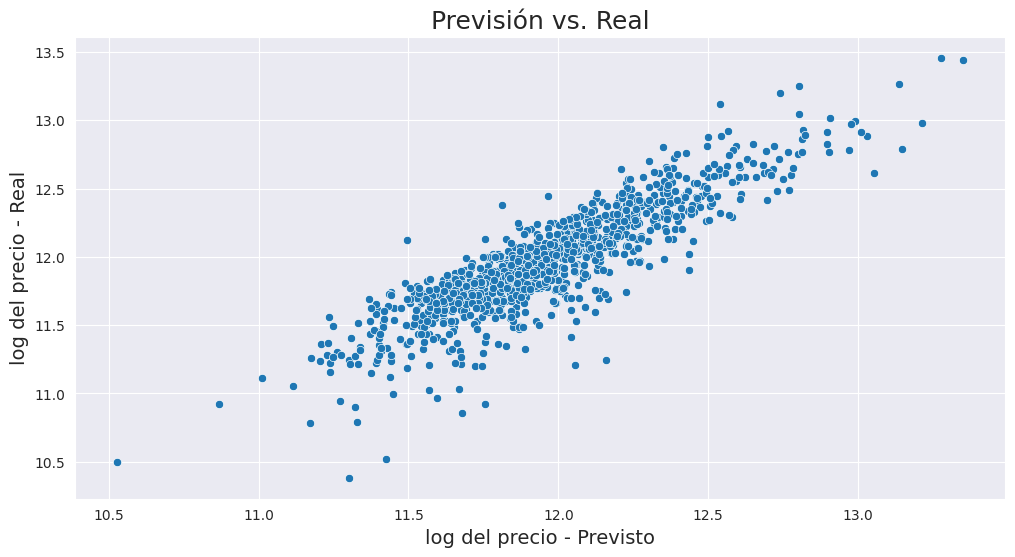

In [57]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)

ax.figure.set_size_inches(12,6)
ax.set_title('Previsión vs. Real',fontsize=18)
ax.set_xlabel('log del precio - Previsto',fontsize=14)
ax.set_ylabel('log del precio - Real',fontsize=14)

plt.show()

#### **Obteniendo los resíduos y observando su comportamiento**

In [58]:
residuo = y_train - y_previsto_train

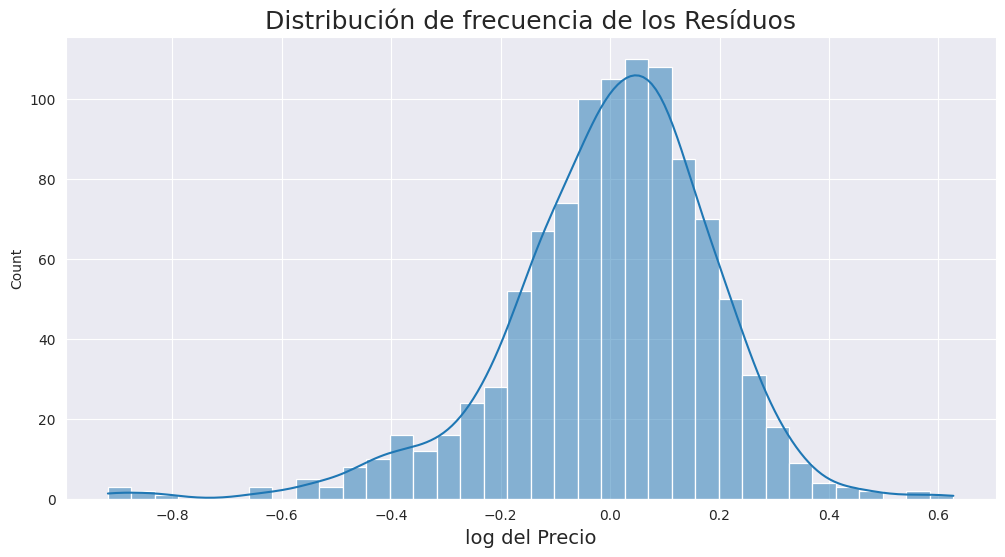

In [60]:
ax = sns.histplot(residuo, kde=True)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribución de frecuencia de los Resíduos',fontsize=18)
ax.set_xlabel('log del Precio',fontsize=14)

plt.show()

##### **Homocedasticidad del modelo**

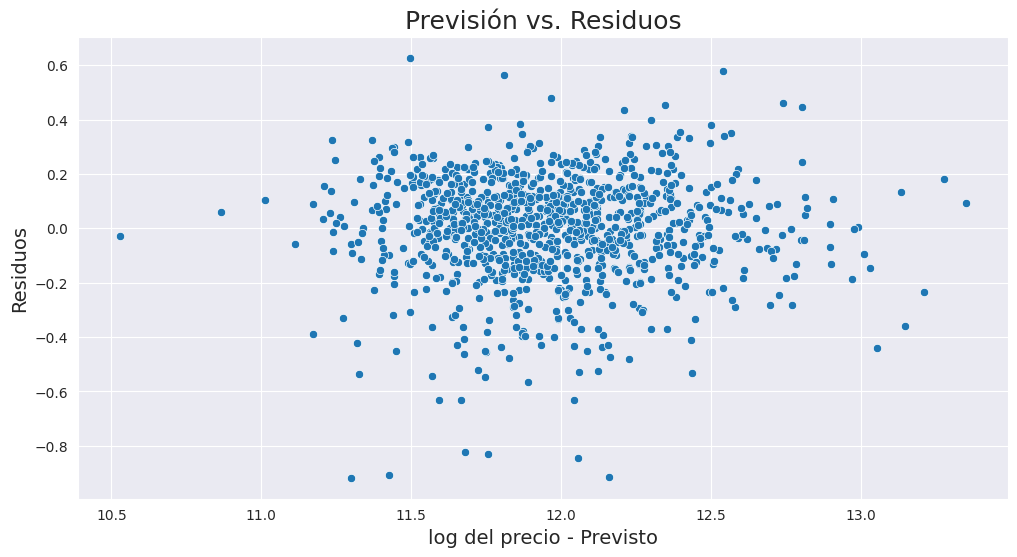

In [61]:
ax = sns.scatterplot(x= y_previsto_train, y=residuo)

ax.figure.set_size_inches(12,6)
ax.set_title('Previsión vs. Residuos',fontsize=18)
ax.set_xlabel('log del precio - Previsto',fontsize=14)
ax.set_ylabel('Residuos',fontsize=14)

plt.show()


## **5.4 - Guardando el modelo y realizando la previsión de otros inmuebles**

---



Para guardar nuestro modelo vamos a utilizar la biblioteca [pickle](https://docs.python.org/3/library/pickle.html), que sirve para serializar y deserializar objetos, permitiendo guardar objetos de Python en un archivo y luego recuperarlos.

En otras palabras, convierte objetos de Python en una representación binaria (serialización) para su almacenamiento o transmisión, y posteriormente reconstruye esos objetos a partir de dicha representación (deserialización).


In [62]:
import pickle

In [63]:
archivo = open('modelo_precificacion_casas','wb')
pickle.dump(modelo,archivo)
archivo.close()

Vamos ahora a guardar el archivo *pickle* y descargar los archivos **"casas_para_precificar.csv"** y **"Precificando_mas_inmuebles.ipynb"** que se encuentran en las actividades de este curso.
